# Kelly Fomula

Due  August 26th by 10:00 am.

Yuan Yao (s2259521)

## 0. Setup

In [ ]:
import os
from google.colab import drive

drive.mount('/content/drive')
os.chdir('drive/My Drive/Colab Notebooks/dissertation/material')
!ls

Mounted at /content/drive
data


In [ ]:
import pandas as pd
import seaborn as sns
import random
import math

# Data libraries
import numpy as np
import scipy
import scipy.stats as stats

# Plotting libraries
import matplotlib.pyplot as plt

# Plotting defaults
plt.rcParams['figure.figsize'] = (8,5)
plt.rcParams['figure.dpi'] = 80


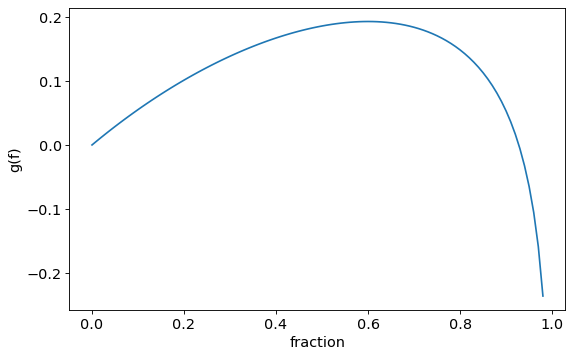

In [ ]:
x=list(np.arange(0,0.99,0.01))
y=[]
for i in x:
    y.append(0.8*np.log(1+i)+0.2*np.log(1-i))
plt.plot(x,y)
plt.xlabel('fraction',fontsize=13)
plt.ylabel('g(f)',fontsize=13)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.show()


In [ ]:

pwin = 0.6  # 胜率
b = 1       # 净赔率
 
 
# 凯利值
def kelly(pwin, b):
    '''
    参数
        pwin 胜率
        b    净赔率
    返回
        f    投注资金比例
    '''
    f = (b * pwin + pwin - 1) / b
    print('kelly position is %s'%f)
    return f
    
# 游戏
def play_game(f, cash=100, m=100):
    '''
    Input:
      f: Kelly Fraction
      cash: initial wealth
      m: the number of games
    Output:
      res: Wealth 
    '''
    global pwin, b
    
    res = [cash]
    win = 0

    for i in range(m):
        if random.random() <= pwin:
            res.append(res[-1] + f*res[-1]*b) 
            win += 1
        else:
            res.append(res[-1] - f*res[-1])
    return res, win
    
    
# Monte Carlo simultions
def montecarlo(n=1000, f=0.15, cash=1000, m=100):
    '''
    Input:
      n: the number of montecarlo simulations
      f: Kelly Fraction
      cash: initial wealth
      m: the number of games
    Output:
       
    '''
    res = []
    final = []
    logfinal = []
    win = []

    for i in range(n):
      res_temp, win_temp = play_game(f, cash, m)
      res.append(res_temp)
      win.append(win_temp)
      final.append(cash*((1+f)**win_temp)*(1-f)**(m-win_temp))
      logfinal.append(np.log(cash*((1+f)**win_temp)*(1-f)**(m-win_temp)))

    geomean = np.exp(np.log(pd.DataFrame(res)).sum(axis=0) / n) # 【几何期望】平滑
    # final = [cash*((1+f)**i)*(1-f)**(m-i) for i in win]
    # logfinal = [np.log(cash*((1+f)**i)*(1-f)**(m-i)) for i in win]

    #return pd.DataFrame(res).sum(axis=0) / n   #【 数学期望】不平滑
    return geomean, final, logfinal
  
def pmf(final):
    b = {}
    for j in final:
      if list(final).count(j)>1:
        b[j] = list(final).count(j)/n
    # print(len(b))
    b_new = dict(sorted(b.items()))
    max_prob = max(b_new.items(), key=lambda x:x[1])[0]
    return b_new, max_prob

kelly position is 0.19999999999999996


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in log


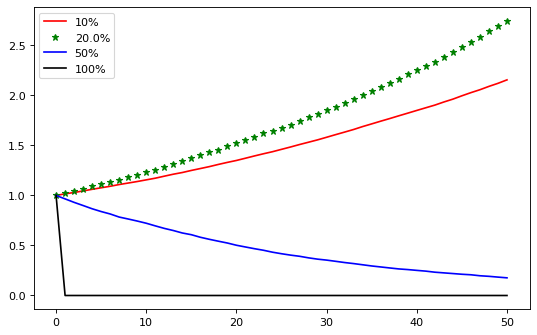

In [ ]:
n = 10000       # 重复次数
cash = 1.0 # 初始资金池
m = 50        # 期数
 
f = 0.1 # 资金比例 10%
res1,final1,logfinal1 = montecarlo(n, f, cash, m)
 
fk = kelly(pwin, b)  # 资金比例 凯利值
res2,final2,logfinal2 = montecarlo(n, fk, cash, m)
 
f = 0.5 # 资金比例 50%
res3,final3,logfinal3 = montecarlo(n, f, cash, m)
 
f = 1.0 # 资金比例 100%
res4,final4,logfinal4 = montecarlo(n, f, cash, m)
 
 
# 画个图看看
fig = plt.figure() 
axes = fig.add_subplot(111)
 
axes.plot(res1,'r-',label='10%')
axes.plot(res2,'g*',label='{:.1%}'.format(fk))
axes.plot(res3,'b-',label='50%')
axes.plot(res4,'k-',label='100%')
plt.legend(loc = 0)
 
plt.show()



In [ ]:
print('0.5比例下注的平均期末资金：%s'%(sum(final3)/n))
print('0.5比例下注的几何平均期末资金：%s'%(sum(logfinal3)/n))
print('Kelly比例下注的平均期末资金：%s'%(sum(final2)/n))
print('Kelly比例下注的几何平均期末资金：%s'%(sum(logfinal2)/n))
print('全押下注的平均期末资金：%s'%(sum(final4)/n))
print('全押下注的几何平均期末资金：%s'%(sum(logfinal4)/n))

0.5比例下注的平均期末资金：74.29821555827142
0.5比例下注的几何平均期末资金：-1.7340360999624638
Kelly比例下注的平均期末资金：7.102407705123104
Kelly比例下注的几何平均期末资金：1.0096544798020177
全押下注的平均期末资金：0.0
全押下注的几何平均期末资金：-inf


In [ ]:

print('0.5比例下注的平均期末资金<Kelly比例下注的平均期末资金的比例：%s '%(np.sum((np.array(final3)<np.array(final2))!=0)/n))


0.5比例下注的平均期末资金<Kelly比例下注的平均期末资金的比例：0.743 


In [ ]:
fraction = list(np.arange(0.1,1,0.1))
for i in range(len(fraction)):
  print(fraction[i])

0.1
0.2
0.30000000000000004
0.4
0.5
0.6
0.7000000000000001
0.8
0.9


the maximum value under f=0.2 is 532.627381435882
P(X50(f=0.2)>1)=0.7643
the maximum value under f=0.5 is 97183.58485201183
P(X50(f=0.5)>1)=0.33


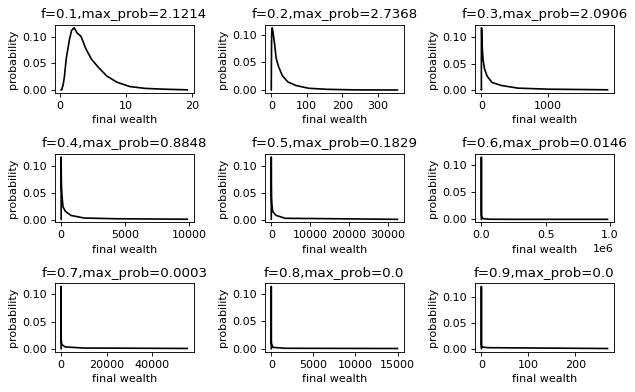

In [ ]:
fig = plt.figure()

ax1 = plt.subplot(331)
f = 0.1
_,final,_ = montecarlo(n, f, cash, m)
temp1, max_prob = pmf(final)
ax1.plot(list(temp1.keys()), list(temp1.values()), 'k-')
ax1.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax1.set_xlabel('final wealth')
ax1.set_ylabel('probability')

ax2 = plt.subplot(332)
f = 0.2
_,final,_ = montecarlo(n, f, cash, m)
print(f'the maximum value under f=0.2 is {max(final)}')
print('P(X50(f=0.2)>1)=%s'%(np.sum((np.array(final2)>1)==1)/n))
temp2, max_prob = pmf(final)
ax2.plot(list(temp2.keys()), list(temp2.values()), 'k-')
ax2.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax2.set_xlabel('final wealth')
ax2.set_ylabel('probability')

ax3 = plt.subplot(333)
f = 0.3
_,final,_ = montecarlo(n, f, cash, m)
temp3, max_prob = pmf(final)
ax3.plot(list(temp3.keys()), list(temp3.values()), 'k-')
ax3.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax3.set_xlabel('final wealth')
ax3.set_ylabel('probability')

ax4 = plt.subplot(334)
f = 0.4
_,final,_ = montecarlo(n, f, cash, m)
temp4, max_prob = pmf(final)
ax4.plot(list(temp4.keys()), list(temp4.values()), 'k-')
ax4.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax4.set_xlabel('final wealth')
ax4.set_ylabel('probability')

ax5 = plt.subplot(335)
f = 0.5
_,final,_ = montecarlo(n, f, cash, m)
print(f'the maximum value under f=0.5 is {max(final)}')
print('P(X50(f=0.5)>1)=%s'%(np.sum((np.array(final3)>1)==1)/n))
temp5, max_prob = pmf(final)
ax5.plot(list(temp5.keys()), list(temp5.values()), 'k-')
ax5.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax5.set_xlabel('final wealth')
ax5.set_ylabel('probability')

ax6 = plt.subplot(336)
f = 0.6
_,final,_ = montecarlo(n, f, cash, m)
temp6, max_prob = pmf(final)
ax6.plot(list(temp6.keys()), list(temp6.values()), 'k-')
ax6.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax6.set_xlabel('final wealth')
ax6.set_ylabel('probability')

ax7 = plt.subplot(337)
f = 0.7
_,final,_ = montecarlo(n, f, cash, m)
temp7, max_prob = pmf(final)
ax7.plot(list(temp7.keys()), list(temp7.values()), 'k-')
ax7.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax7.set_xlabel('final wealth')
ax7.set_ylabel('probability')

ax8 = plt.subplot(338)
f = 0.8
_,final,_ = montecarlo(n, f, cash, m)
temp8, max_prob = pmf(final)
ax8.plot(list(temp8.keys()), list(temp8.values()), 'k-')
ax8.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax8.set_xlabel('final wealth')
ax8.set_ylabel('probability')

ax9 = plt.subplot(339)
f = 0.9
_,final,_ = montecarlo(n, f, cash, m)
temp9, max_prob = pmf(final)
ax9.plot(list(temp9.keys()), list(temp9.values()), 'k-')
ax9.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax9.set_xlabel('final wealth')
ax9.set_ylabel('probability')

fig.tight_layout()

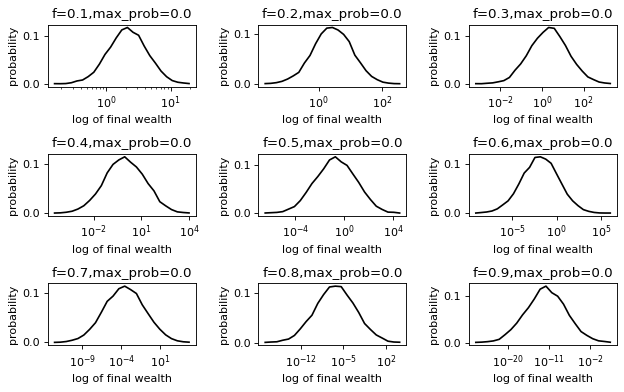

In [ ]:
fig = plt.figure()

ax1 = plt.subplot(331)
f = 0.1
ax1.plot(list(temp1.keys()), list(temp1.values()), 'k-')
ax1.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax1.set_xlabel('log of final wealth')
ax1.set_ylabel('probability')
ax1.set_xscale('log')

ax2 = plt.subplot(332)
f = 0.2
ax2.plot(list(temp2.keys()), list(temp2.values()), 'k-')
ax2.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax2.set_xlabel('log of final wealth')
ax2.set_ylabel('probability')
ax2.set_xscale('log')

ax3 = plt.subplot(333)
f = 0.3
ax3.plot(list(temp3.keys()), list(temp3.values()), 'k-')
ax3.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax3.set_xlabel('log of final wealth')
ax3.set_ylabel('probability')
ax3.set_xscale('log')

ax4 = plt.subplot(334)
f = 0.4
ax4.plot(list(temp4.keys()), list(temp4.values()), 'k-')
ax4.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax4.set_xlabel('log of final wealth')
ax4.set_ylabel('probability')
ax4.set_xscale('log')

ax5 = plt.subplot(335)
f = 0.5
ax5.plot(list(temp5.keys()), list(temp5.values()), 'k-')
ax5.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax5.set_xlabel('log of final wealth')
ax5.set_ylabel('probability')
ax5.set_xscale('log')

ax6 = plt.subplot(336)
f = 0.6
ax6.plot(list(temp6.keys()), list(temp6.values()), 'k-')
ax6.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax6.set_xlabel('log of final wealth')
ax6.set_ylabel('probability')
ax6.set_xscale('log')

ax7 = plt.subplot(337)
f = 0.7
ax7.plot(list(temp7.keys()), list(temp7.values()), 'k-')
ax7.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax7.set_xlabel('log of final wealth')
ax7.set_ylabel('probability')
ax7.set_xscale('log')

ax8 = plt.subplot(338)
f = 0.8
ax8.plot(list(temp8.keys()), list(temp8.values()), 'k-')
ax8.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax8.set_xlabel('log of final wealth')
ax8.set_ylabel('probability')
ax8.set_xscale('log')

ax9 = plt.subplot(339)
f = 0.9
ax9.plot(list(temp9.keys()), list(temp9.values()), 'k-')
ax9.set_title(f'f={f},max_prob={round(max_prob,4)}')
ax9.set_xlabel('log of final wealth')
ax9.set_ylabel('probability')
ax9.set_xscale('log')

fig.tight_layout()

In [ ]:
max(final2)

532.627381435882

In [ ]:
max(final3)

97183.58485201183

In [ ]:
print(f'f=0.2时，X50的最大值为{max(final2)}')
print(f'f=0.5时，X50的最大值为{max(final3)}')

f=0.2时，X50的最大值为532.627381435882
f=0.5时，X50的最大值为97183.58485201183
